In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
#loading the data sets
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment,label
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [3]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
 2   label      50000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [4]:
df.describe()

,label
count,50000.000000
mean,0.500000
std,0.500005
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


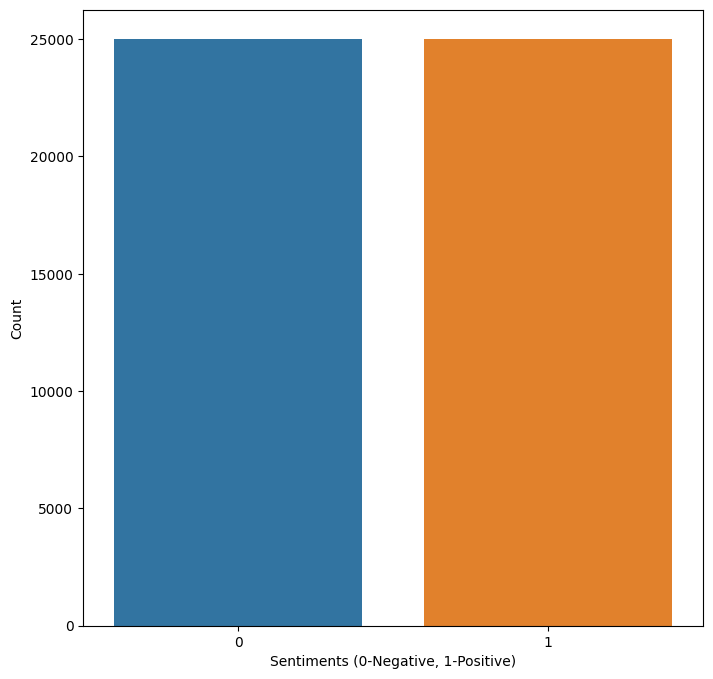

In [5]:
# Visualizing the count of 'Label' column from the dataset
plt.figure(figsize=(8,8))
sns.countplot(x='label', data=df)
plt.xlabel('Sentiments (0-Negative, 1-Positive)')
plt.ylabel('Count')
plt.show()

DATA CLEANING AND PREPROCESSING :

In [6]:
print(df.shape)

(50000, 3)


In [7]:
# Finding any NaN values
df.isna().any()

review       False
sentiment    False
label        False
dtype: bool

In [8]:
df_copy = df.copy()

In [9]:
df_copy.reset_index(inplace=True)

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame named df with columns 'review', 'sentiment', and 'label'
# Replace these column names based on your actual data

# Selecting features (X) and target variable (y)
X = df_copy[['review', 'sentiment']]
y = df_copy['label']

# Splitting the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating DataFrames for train and test sets
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

# Displaying the sizes of the train and test sets
print('Train size: {}, Test size: {}'.format(train.shape, test.shape))


Train size: (40000, 3), Test size: (10000, 3)


In [11]:
# Importing essential libraries for performing Natural Language Processing on given dataset
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [12]:
# Removing punctuation and special character from the text
train.replace(to_replace='[^a-zA-Z]', value=' ', regex=True, inplace=True)
test.replace(to_replace='[^a-zA-Z]', value=' ', regex=True, inplace=True)

In [13]:
# Renaming columns
new_columns = [str(i) for i in range(0,3)]
train.columns = new_columns
test.columns = new_columns

In [14]:
# Converting the entire text to lower case
for i in new_columns:
    if train[i].dtype == 'O':  # Check if the column contains object (string) data
        train[i] = train[i].str.lower()
    
    if test[i].dtype == 'O':
        test[i] = test[i].str.lower()

In [15]:
# Joining all the columns
train_headlines = []
test_headlines = []

for row in range(0, train.shape[0]):
  train_headlines.append(' '.join(str(x) for x in train.iloc[row, 0:3]))

for row in range(0, test.shape[0]):
  test_headlines.append(' '.join(str(x) for x in test.iloc[row, 0:3]))

In [16]:
train_headlines[0]

'that s what i kept asking myself during the many fights  screaming matches  swearing and general mayhem that permeate the    minutes  the comparisons also stand up when you think of the one dimensional characters  who have so little depth that it is virtually impossible to care what happens to them  they are just badly written cyphers for the director to hang his multicultural beliefs on  a topic that has been done much better in other dramas both on tv and the cinema  br    br   i must confess  i m not really one for spotting bad performances during a film  but it must be said that nichola burley  as the heroine s slutty best friend  and wasim zakir  as the nasty  bullying brother  were absolutely terrible  i don t know what acting school they graduated from  but if i was them i d apply for a full refund post haste  only samina awan in the lead role manages to impress in a cast of so called british talent that we ll probably never hear from again  at least  that s the hope  next time

In [17]:
test_headlines[0]

'i really liked this summerslam due to the look of the arena  the curtains and just the look overall was interesting to me for some reason  anyways  this could have been one of the best summerslam s ever if the wwf didn t have lex luger in the main event against yokozuna  now for it s time it was ok to have a huge fat man vs a strong man but i m glad times have changed  it was a terrible main event just like every match luger is in is terrible  other matches on the card were razor ramon vs ted dibiase  steiner brothers vs heavenly bodies  shawn michaels vs curt hening  this was the event where shawn named his big monster of a body guard diesel  irs vs       kid  bret hart first takes on doink then takes on jerry lawler and stuff with the harts and lawler was always very interesting  then ludvig borga destroyed marty jannetty  undertaker took on giant gonzalez in another terrible match  the smoking gunns and tatanka took on bam bam bigelow and the headshrinkers  and yokozuna defended th

In [18]:
# Creating corpus of train dataset
ps = PorterStemmer()
train_corpus = []

for i in range(0, len(train_headlines)):
  
  # Tokenizing the news-title by words
  words = train_headlines[i].split()

  # Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  headline = ' '.join(words)

  # Building a corpus of news-title
  train_corpus.append(headline)

In [19]:
# Creating corpus of test dataset
test_corpus = []

for i in range(0, len(test_headlines)):
  
  # Tokenizing the news-title by words
  words = test_headlines[i].split()

  # Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  headline = ' '.join(words)

  # Building a corpus of news-title
  test_corpus.append(headline)

In [20]:
train_corpus[0:10]

['kept ask mani fight scream match swear gener mayhem permeat minut comparison also stand think one dimension charact littl depth virtual imposs care happen badli written cypher director hang multicultur belief topic done much better drama tv cinema br br must confess realli one spot bad perform film must said nichola burley heroin slutti best friend wasim zakir nasti bulli brother absolut terribl know act school graduat appli full refund post hast samina awan lead role manag impress cast call british talent probabl never hear least hope next time hire differ scout br br anoth intrigu thought hideous fashion soundtrack featur like snow patrol ian brown kean bit music fan familiar artist output recognis track movi apart omnipres run b side anyon get mani mani music montag telegraph suppos feel accompani startlingli origin imag coupl kiss swollen lake canoodl doorway problem none song convey mood effici realis director lack abil carri emot journey audienc storytel dialogu alon br br end 

In [21]:
test_corpus[0:10]

['realli like summerslam due look arena curtain look overal interest reason anyway could one best summerslam ever wwf lex luger main event yokozuna time ok huge fat man vs strong man glad time chang terribl main event like everi match luger terribl match card razor ramon vs ted dibias steiner brother vs heavenli bodi shawn michael vs curt hene event shawn name big monster bodi guard diesel ir vs kid bret hart first take doink take jerri lawler stuff hart lawler alway interest ludvig borga destroy marti jannetti undertak took giant gonzalez anoth terribl match smoke gunn tatanka took bam bam bigelow headshrink yokozuna defend world titl lex luger match bore terribl end howev deserv posit 1',
 'mani televis show appeal quit mani differ kind fan like farscap know youngster year old fan male femal mani differ countri think ador v miniseri element found almost everi show v charact driven drama could australian soap opera yet episod scienc fact fiction would give even hardiest trekki run mon

In [22]:
down_words = []
for i in list(y_train[y_train==0].index):
    if i < len(train_corpus):
        down_words.append(train_corpus[i])

up_words = []
for i in list(y_train[y_train==1].index):
    if i < len(train_corpus):
        up_words.append(train_corpus[i])


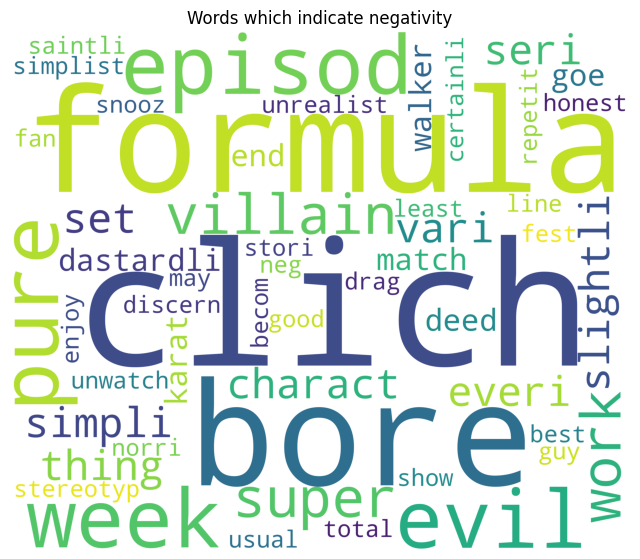

In [23]:
# Creating wordcloud for down_words
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(down_words[1])
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate negativity")
plt.show()

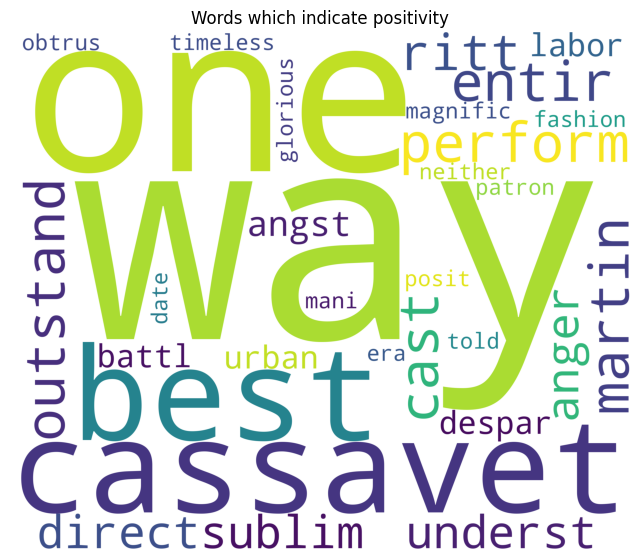

In [24]:
# Creating wordcloud for up_words
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(up_words[5])
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate positivity")
plt.show()

In [25]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(2,2))
X_train = cv.fit_transform(train_corpus).toarray()

In [26]:
X_test = cv.transform(test_corpus).toarray()

In [27]:
from sklearn.linear_model import LogisticRegression
import joblib

lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
joblib.dump(lr_classifier, 'lr_model.pkl')

['lr_model.pkl']

In [28]:
lr_y_pred = lr_classifier.predict(X_test)

In [29]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, lr_y_pred)
score2 = precision_score(y_test, lr_y_pred)
score3 = recall_score(y_test, lr_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 87.2%
Precision score is: 0.87
Recall score is: 0.88


In [30]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test, lr_y_pred)

In [31]:
lr_cm

array([[4298,  663],
       [ 617, 4422]], dtype=int64)

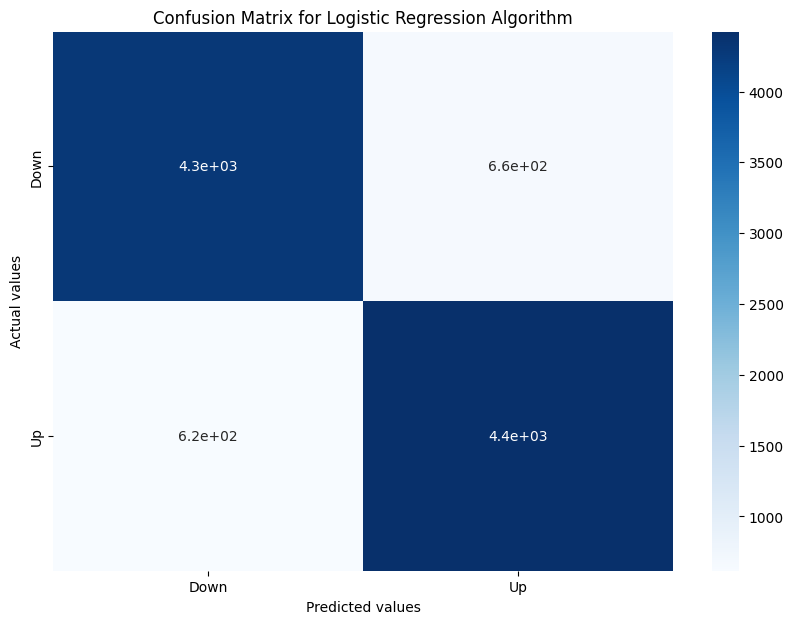

In [32]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=lr_cm, annot=True, cmap="Blues", xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression Algorithm')
plt.show()

In [33]:
from sklearn.ensemble import RandomForestClassifier
import joblib

rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf_classifier.fit(X_train, y_train)
joblib.dump(rf_classifier, 'rf_model.pkl')

['rf_model.pkl']

In [34]:
rf_y_pred = rf_classifier.predict(X_test)

In [35]:
# Accuracy, Precision and Recall
score1 = accuracy_score(y_test, rf_y_pred)
score2 = precision_score(y_test, rf_y_pred)
score3 = recall_score(y_test, rf_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 85.24%
Precision score is: 0.85
Recall score is: 0.85


In [36]:
# Making the Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)

In [37]:
rf_cm

array([[4231,  730],
       [ 746, 4293]], dtype=int64)

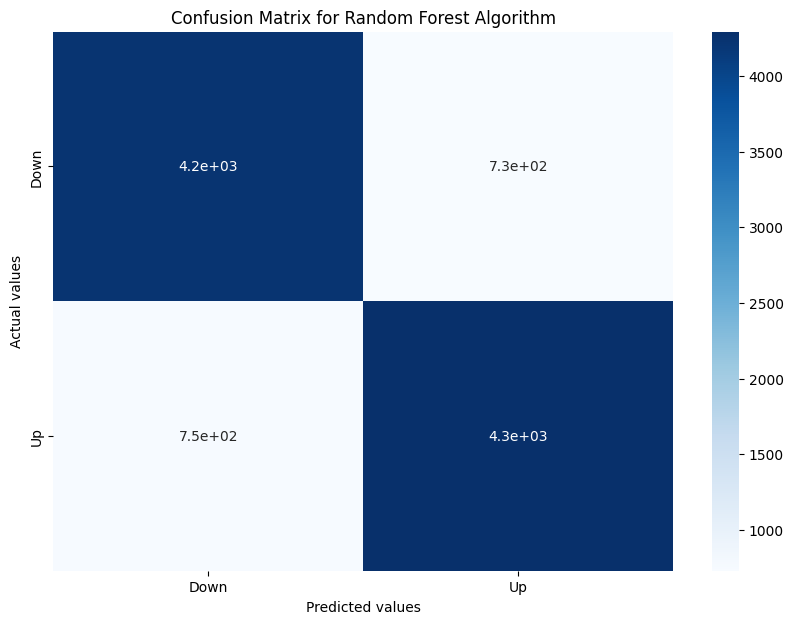

In [38]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=rf_cm, annot=True, cmap="Blues", xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Random Forest Algorithm')
plt.show()

In [39]:
from sklearn.naive_bayes import MultinomialNB
import joblib

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
joblib.dump(nb_classifier, 'nb_model.pkl')

['nb_model.pkl']

In [40]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [41]:
# Accuracy, Precision and Recall
score1 = accuracy_score(y_test, nb_y_pred)
score2 = precision_score(y_test, nb_y_pred)
score3 = recall_score(y_test, nb_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 88.46%
Precision score is: 0.87
Recall score is: 0.91


In [42]:
# Making the Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [43]:
nb_cm

array([[4279,  682],
       [ 472, 4567]], dtype=int64)

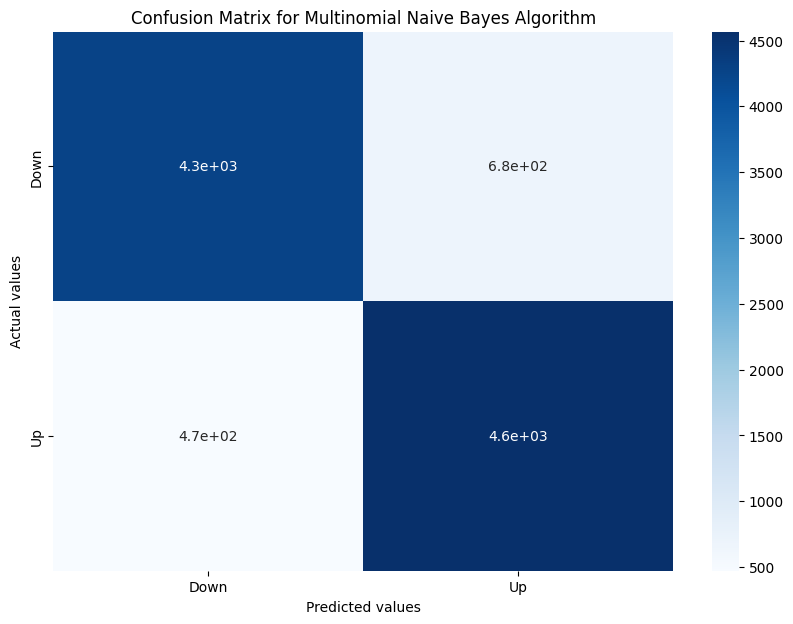

In [44]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [45]:
from tkinter import *
import joblib
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

# Load the trained models
lr_model = joblib.load('lr_model.pkl')
nb_model = joblib.load('nb_model.pkl')
rf_model = joblib.load('rf_model.pkl')

In [52]:
# Define the preprocess function with a CountVectorizer instance as an argument
def preprocess_text(text, cv):
    if cv is None:
        # Initialize CountVectorizer if cv is None
        cv = CountVectorizer(max_features=10000, ngram_range=(1, 2))
        cv.fit(train_corpus)
    # Initialize Porter Stemmer
    ps = PorterStemmer()
    # Tokenize the text
    words = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words]
    # Stem the words
    words = [ps.stem(word) for word in words]
    # Join the words
    text = ' '.join(words)
    # Transform the text using the provided CountVectorizer
    X = cv.transform([text]).toarray()
    return X

# Define the predict_lr function with a CountVectorizer instance as an argument
def predict_lr(text, cv):
    # Preprocess the text
    X = preprocess_text(text, cv)
    # Predict sentiment using Logistic Regression model
    prediction = lr_classifier.predict(X)
    return prediction

# Define the predict_nb function with a CountVectorizer instance as an argument
def predict_nb(text, cv):
    # Preprocess the text
    X = preprocess_text(text, cv)
    # Predict sentiment using Naive Bayes model
    prediction = nb_classifier.predict(X)
    return prediction

# Define the predict_rf function with a CountVectorizer instance as an argument
def predict_rf(text, cv):
    # Preprocess the text
    X = preprocess_text(text, cv)
    # Predict sentiment using Random Forest model
    prediction = rf_classifier.predict(X)
    return prediction

# Define a function to handle the prediction button click event
def predict_sentiment():
    # Get the text from the Entry widget
    text = text_entry.get()
    # Preprocess the text using the CountVectorizer instance
    X = preprocess_text(text, cv)
    # Predict sentiment based on the selected model
    if selected_model.get() == 'Logistic Regression':
        prediction = predict_lr(text, cv)
    elif selected_model.get() == 'Naive Bayes':
        prediction = predict_nb(text, cv)
    elif selected_model.get() == 'Random Forest':
        prediction = predict_rf(text, cv)
    
    # Update the output label based on the prediction
    if prediction == 1:
        output_label.config(text='Positive')
    else:
        output_label.config(text='Negative')

# Create a Tkinter GUI
root = Tk()
root.title('Sentiment Analysis')

# Create a frame for the GUI elements
frame = Frame(root)
frame.pack(padx=10, pady=10)

# Add a label for the text entry
label = Label(frame, text='Enter review:')
label.grid(row=0, column=0, padx=5, pady=5)

# Add an entry widget for text input
text_entry = Entry(frame, width=50)
text_entry.grid(row=0, column=1, padx=5, pady=5)

# Add a label for model selection
model_label = Label(frame, text='Select Model:')
model_label.grid(row=1, column=0, padx=5, pady=5)

# Add a dropdown menu for selecting the model
models = ['Logistic Regression', 'Naive Bayes', 'Random Forest']
selected_model = StringVar()
selected_model.set(models[0])  # Set default value
model_menu = OptionMenu(frame, selected_model, *models)
model_menu.grid(row=1, column=1, padx=5, pady=5)

# Add a button to trigger sentiment prediction
predict_button = Button(frame, text='Predict Sentiment', command=predict_sentiment)
predict_button.grid(row=2, column=0, columnspan=2, padx=5, pady=5)

# Add a label to display the predicted sentiment
output_label = Label(frame, text='')
output_label.grid(row=3, column=0, columnspan=2, padx=5, pady=5)

# Start the Tkinter event loop
root.mainloop()
